In [13]:
%matplotlib inline

In [14]:
from skimage import io

In [15]:
from sklearn.cluster import KMeans

In [16]:
import numpy as np

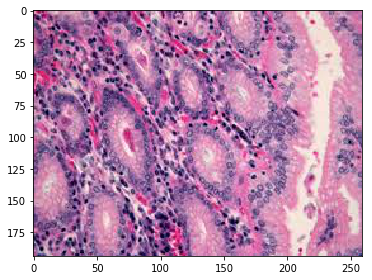

In [5]:
image = io.imread('/home/raj/Downloads/colon_tissue.jpeg')
io.imshow(image)
io.show()

In [6]:
rows=image.shape[0]
cols=image.shape[1]
image=image.reshape(image.shape[0]*image.shape[1],3)

In [8]:
kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=200)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.cluster_centers_

array([[126.72989691,  78.61078509, 130.24292889],
       [210.00698988, 150.7719511 , 187.87983148]])

In [ ]:
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 
 
np.save('/media/raj/Raj1_5/kmeans/colon_tissue.npy',clusters)    
io.imsave('/media/raj/Raj1_5/kmeans/colon_tissue.png',labels);

In [ ]:
centers = np.load('/media/raj/Raj1_5/kmeans/colon_tissue.npy')
c_image = io.imread('/media/raj/Raj1_5/kmeans/colon_tissue.png')

In [ ]:
image = np.zeros((c_image.shape[0],c_image.shape[1],3),dtype=np.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]
io.imsave('/media/raj/Raj1_5/kmeans/reconstructed_colon.png',image);
io.imshow(image)
io.show()

In [ ]:
## K-means clustering of Pathology Images

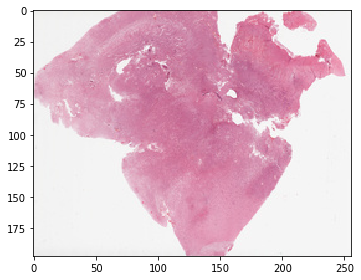

In [52]:
image = io.imread('/media/raj/Raj1_5/kmeans/TCGA-02-0001-01Z-00-DX2.b521a862-280c-4251-ab54-5636f20605d0.jpeg')
io.imshow(image)
io.show()

In [18]:
rows=image.shape[0]
cols=image.shape[1]
image=image.reshape(image.shape[0]*image.shape[1],3)

In [34]:
format(image.size)

'152064'

In [35]:
format(image.shape)

'(50688, 3)'

In [37]:
image[5000]

array([205, 125, 160], dtype=uint8)

In [38]:
format(image[5000,0])

'205'

In [39]:
format(image[5000,1])

'125'

In [40]:
format(image[5000,2])

'160'

In [53]:
type(image)

numpy.ndarray

In [56]:
image.size

152064

In [61]:
image.shape

(198, 256, 3)

In [57]:
image.min(), image.max()

(41, 255)

In [58]:
image.mean()

205.99813236531986

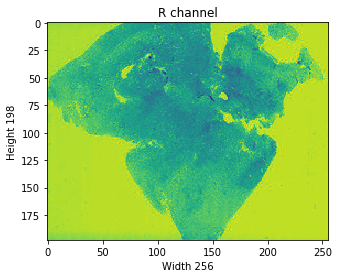

In [60]:
plt.title('R channel')
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
plt.imshow(image[ : , : , 0])
plt.show()

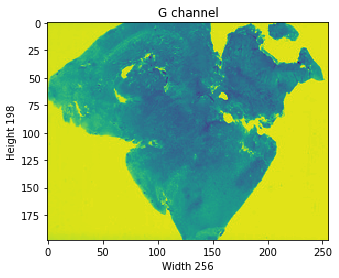

In [62]:
plt.title('G channel')
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
plt.imshow(image[ : , : , 1])
plt.show()

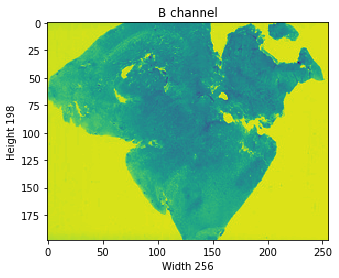

In [63]:
plt.title('B channel')
plt.ylabel('Height {}'.format(image.shape[0]))
plt.xlabel('Width {}'.format(image.shape[1]))
plt.imshow(image[ : , : , 2])
plt.show()

In [64]:
image[100,50]

array([227, 185, 205], dtype=uint8)

In [66]:
image[100,50,0],image[100,50,1],image[100,50,2]

(227, 185, 205)

In [ ]:
# kmeans = KMeans(n_clusters = 128, n_init=10, max_iter=200)
kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=200)

kmeans.fit(image)

In [ ]:
clusters

In [ ]:
cv2.imshow('R-RGB',image[:, :, 2])

In [ ]:
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 
 
np.save('/media/raj/Raj1_5/kmeans/codebook_TCGA-02-0001-01Z.npy',clusters)    
io.imsave('/media/raj/Raj1_5/kmeans/compressed_TCGA-02-0001-01Z.png',labels);

In [ ]:
centers = np.load('/media/raj/Raj1_5/kmeans/codebook_TCGA-02-0001-01Z.npy')
c_image = io.imread('/media/raj/Raj1_5/kmeans/compressed_TCGA-02-0001-01Z.png')

In [ ]:
image = np.zeros((c_image.shape[0],c_image.shape[1],3),dtype=np.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]
io.imsave('/media/raj/Raj1_5/kmeans/reconstructed_TCGA-02-0001-01Z.png',image);
io.imshow(image)
io.show()

In [41]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
 
	# return the histogram
	return hist

In [ ]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

In [ ]:
hist = centroid_histogram(kmeans)
bar = plot_colors(hist, kmeans.cluster_centers_)

In [ ]:
# show our color bart
plt.figure()
plt.imshow(bar)
plt.show()

In [ ]:
plt.figure()

In [ ]:
plt.imshow(bar)

In [ ]:
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import cv2

In [ ]:
import plotly
plotly.tools.set_credentials_file(username='sraja2911', api_key='IoeFycToNYSPKNijoAPs')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

In [ ]:
y0 = kmeans
y1 = labels

trace0 = go.Box(
    y=y0
)
trace1 = go.Box(
    y=y1
)
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='color intensity',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(data)

In [ ]:
y0 = clusters
y1 = labels

data = [go.Histogram(x=y1)]

layout = go.Layout(
    yaxis=dict(
        title='color intensity',
        zeroline=True
    ),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(data)